In [211]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
MY_SEED = 18358526

random.seed(MY_SEED)
np.random.seed(MY_SEED)
rng = np.random.default_rng(MY_SEED)

print(f"Random Seed set to: {MY_SEED}")

Random Seed set to: 18358526


In [212]:
# Read the CSV file
num = pd.read_csv("rmpCapstoneNum.csv", header=None)

In [213]:
num.columns = ['Avg_Rating', 'Avg_Difficulty', 'NumofRatings', 'Pepper', 'Again?', 'From online', 'Male', 'Female']
num.head()

,Avg_Rating,Avg_Difficulty,NumofRatings,Pepper,Again?,From online,Male,Female
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0


5. Is there a gender difference in terms of average difficulty? Again, a significance test is indicate

In [214]:
num.describe()

,Avg_Rating,Avg_Difficulty,NumofRatings,Pepper,Again?,From online,Male,Female
count,70004.000000,70004.000000,70004.000000,70004.000000,12160.000000,70004.000000,89893.000000,89893.000000
mean,3.808014,2.864623,5.374721,0.279927,76.417105,0.315611,0.326789,0.301903
std,1.126895,0.991064,8.136628,0.448966,25.011441,1.054728,0.469042,0.459086
min,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,0.000000,60.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,3.000000,0.000000,83.000000,0.000000,0.000000,0.000000
75%,4.800000,3.500000,6.000000,1.000000,100.000000,0.000000,1.000000,1.000000
max,5.000000,5.000000,393.000000,1.000000,100.000000,19.000000,1.000000,1.000000


In [215]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89893 entries, 0 to 89892
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Avg_Rating      70004 non-null  float64
 1   Avg_Difficulty  70004 non-null  float64
 2   NumofRatings    70004 non-null  float64
 3   Pepper          70004 non-null  float64
 4   Again?          12160 non-null  float64
 5   From online     70004 non-null  float64
 6   Male            89893 non-null  int64  
 7   Female          89893 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 5.5 MB


In [216]:
# Combine two gender columns into one
num['Gender'] = num['Male'] + num['Female'] * -1
num['Gender'] = num['Gender'].astype(int)

In [217]:
# Replace 0 values with NaN in Gender column
num['Gender'] = num['Gender'].replace(0, pd.NA)
num['Gender'] = num['Gender'].replace(2, pd.NA)

# Drop null values in Avg_Difficulty
num = num.dropna(subset=['Avg_Difficulty', 'Gender'])

In [218]:
# Take Mann-Whitney U test to test if there is a significant difference in Avg_Difficulty between male and female professors

# Use all data
male_difficulty = num.loc[num['Gender'] == 1, 'Avg_Difficulty']
female_difficulty = num.loc[num['Gender'] == -1, 'Avg_Difficulty']

stat, p = mannwhitneyu(male_difficulty, female_difficulty, alternative='two-sided')
print("Using all data:")
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

# Use data which has at least 2 ratings, since the last 25% of data has 2 rating
male_difficulty = num.loc[(num['Gender'] == 1) & (num['NumofRatings'] >= 2), 'Avg_Difficulty']
female_difficulty = num.loc[(num['Gender'] == -1) & (num['NumofRatings'] >= 2), 'Avg_Difficulty']

stat, p = mannwhitneyu(male_difficulty, female_difficulty, alternative='two-sided')
print("Using data with at least 2 ratings:")
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

# Use data which has at least 3 ratings, since the last 50% of data has less than 3 ratings
male_difficulty = num.loc[(num['Gender'] == 1) & (num['NumofRatings'] >= 3), 'Avg_Difficulty']
female_difficulty = num.loc[(num['Gender'] == -1) & (num['NumofRatings'] >= 3), 'Avg_Difficulty']

stat, p = mannwhitneyu(male_difficulty, female_difficulty, alternative='two-sided')
print("Using data with at least 3 ratings:")
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

# Use data which has at least 6 ratings, since the last 75% of data has less than 6 ratings
male_difficulty = num.loc[(num['Gender'] == 1) & (num['NumofRatings'] >= 6), 'Avg_Difficulty']
female_difficulty = num.loc[(num['Gender'] == -1) & (num['NumofRatings'] >= 6), 'Avg_Difficulty']

stat, p = mannwhitneyu(male_difficulty, female_difficulty, alternative='two-sided')
print("Using data with at least 6 ratings:")
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

# Use data which has at least 10 ratings
male_difficulty = num.loc[(num['Gender'] == 1) & (num['NumofRatings'] >= 10), 'Avg_Difficulty']
female_difficulty = num.loc[(num['Gender'] == -1) & (num['NumofRatings'] >= 10), 'Avg_Difficulty']

stat, p = mannwhitneyu(male_difficulty, female_difficulty, alternative='two-sided')
print("Using data with at least 10 ratings:")
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

Using all data:
Mann-Whitney U test statistic: 337740081.0, p-value: 0.6427861627773832
Using data with at least 2 ratings:
Mann-Whitney U test statistic: 185788757.5, p-value: 0.8936314303305133
Using data with at least 3 ratings:
Mann-Whitney U test statistic: 110265126.0, p-value: 0.7339757984597012
Using data with at least 6 ratings:
Mann-Whitney U test statistic: 27435669.0, p-value: 0.9680622117890496
Using data with at least 10 ratings:
Mann-Whitney U test statistic: 6192402.0, p-value: 0.7855271637343776


6. Please quantify the likely size of this effect at 95% confidence

In [219]:
def bootstrap_effect_size(num, threshold):
    # Prepare data for Bootstrap
    male_data = num.loc[(num['Gender'] == 1) & (num['NumofRatings'] >= threshold), 'Avg_Difficulty'].values
    female_data = num.loc[(num['Gender'] == -1) & (num['NumofRatings'] >= threshold), 'Avg_Difficulty'].values

    # Calculate the observed effect size
    actual_diff = np.mean(male_data) - np.mean(female_data)

    # Bootstrap process
    n_boot = 10000
    boot_diffs = []

    for _ in range(n_boot):
        # Resample with replacement
        male_sample = rng.choice(male_data, size=len(male_data), replace=True)
        female_sample = rng.choice(female_data, size=len(female_data), replace=True)

        # Calculate the difference for this bootstrap sample
        diff = np.mean(male_sample) - np.mean(female_sample)
        boot_diffs.append(diff)

    # Convert to array
    boot_diffs = np.array(boot_diffs)

    # Calculate 95% confidence interval
    ci_lower = np.percentile(boot_diffs, 2.5)
    ci_upper = np.percentile(boot_diffs, 97.5)

    print(f"Effect Size: {actual_diff:.4f}")
    print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

In [220]:
for threshold in [1, 2, 3, 6, 10]:
    print(f"\nBootstrap Effect Size for NumofRatings >= {threshold}:")
    bootstrap_effect_size(num, threshold)


Bootstrap Effect Size for NumofRatings >= 1:
Effect Size: -0.0056
95% Confidence Interval: [-0.0230, 0.0112]

Bootstrap Effect Size for NumofRatings >= 2:
Effect Size: -0.0028
95% Confidence Interval: [-0.0209, 0.0153]

Bootstrap Effect Size for NumofRatings >= 3:
Effect Size: 0.0014
95% Confidence Interval: [-0.0183, 0.0208]

Bootstrap Effect Size for NumofRatings >= 6:
Effect Size: -0.0012
95% Confidence Interval: [-0.0266, 0.0241]

Bootstrap Effect Size for NumofRatings >= 10:
Effect Size: -0.0070
95% Confidence Interval: [-0.0441, 0.0286]


7. Build a regression model predicting average rating from all numerical predictors (the ones in the
rmpCapstoneNum.csv) file. Make sure to include the R2 and RMSE of this model. Which of these
factors is most strongly predictive of average rating? Hint: Make sure to address collinearity concerns.


Multicollinearity Analysis:
Found 3 feature pairs with |r| > 0.8

Top 10 most correlated feature pairs:
  Feature 1 Feature 2  Correlation
2    Female    Gender         -1.0
0      Male    Female         -1.0
1      Male    Gender          1.0


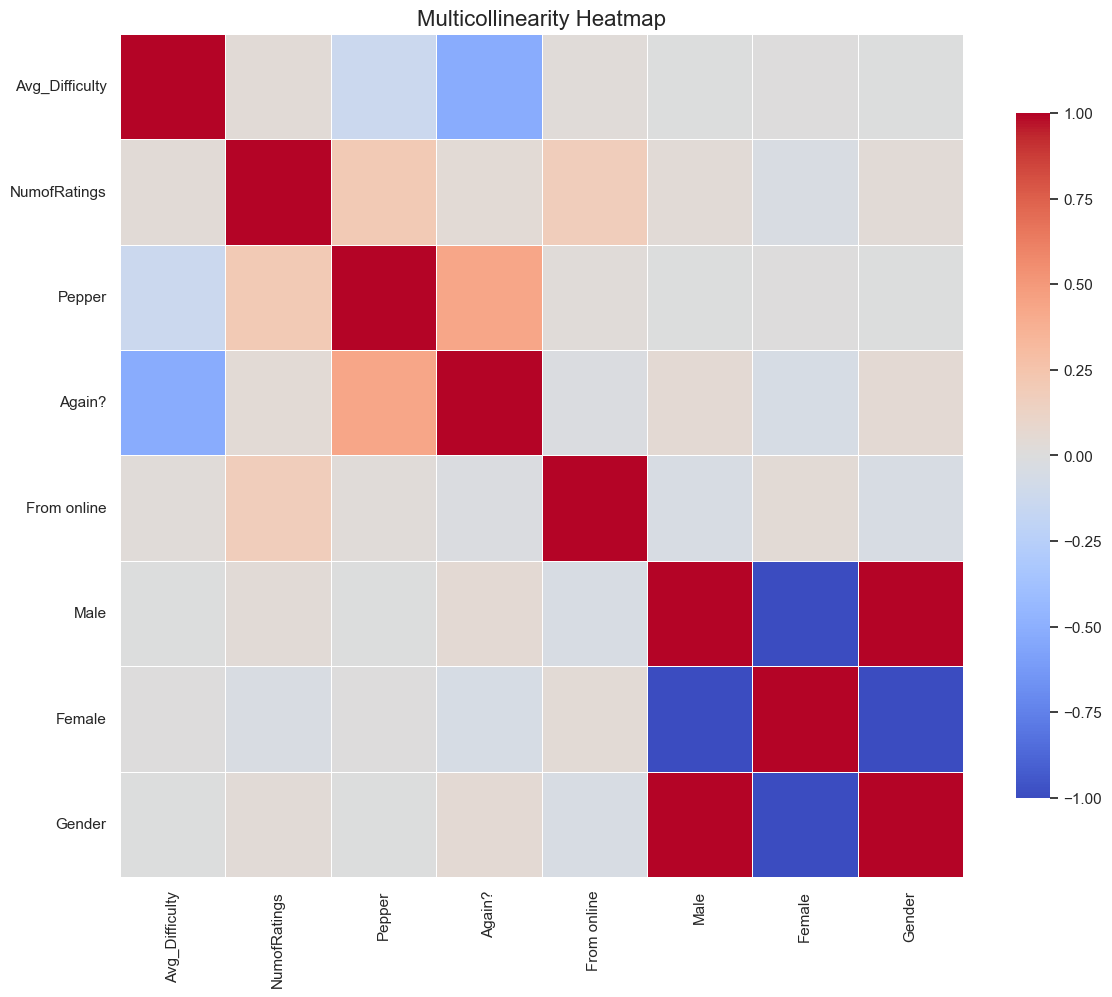

In [221]:
# We will check for multicollinearity among the features by calculating the correlation matrix, only correlation of the gender features are higher than 0.8
# Mulicolinearity
# --- Check for Multicollinearity ---
# Select only the features (exclude target)
features_for_collinearity = num.drop(columns=['Avg_Rating'])

# Calculate correlation matrix among features, add labels
feature_corr_matrix = features_for_collinearity.corr()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(feature_corr_matrix.columns)):
    for j in range(i+1, len(feature_corr_matrix.columns)):
        if abs(feature_corr_matrix.iloc[i, j]) > 0.8:  # threshold for high correlation
            high_corr_pairs.append({
                'Feature 1': feature_corr_matrix.columns[i],
                'Feature 2': feature_corr_matrix.columns[j],
                'Correlation': feature_corr_matrix.iloc[i, j]
            })

print("\nMulticollinearity Analysis:")
print("=" * 60)
print(f"Found {len(high_corr_pairs)} feature pairs with |r| > 0.8")

if len(high_corr_pairs) > 0:
    print("\nTop 10 most correlated feature pairs:")
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
    print(high_corr_df.head(10))

# Create heatmap for a subset of features
plt.figure(figsize=(12, 10))
sns.heatmap(feature_corr_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Multicollinearity Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


In [222]:
# Define features and target variable
# Since feature male, female, and gender are collinear, we only keep gender
predictors = ['Avg_Difficulty', 'NumofRatings', 'Pepper', 'Again?', 'From online', 'Gender']
target = 'Avg_Rating'

# Drop null values in predictors and target
regression_data = num[predictors + [target]].dropna()

print(f"Original: {len(num)}")
print(f"After removing null values: {len(regression_data)}")

# Define X and y
X = regression_data[predictors]
y = regression_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=MY_SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transform arrays back to DataFrames for statsmodels
X_train_scaled = pd.DataFrame(X_train_scaled, columns=predictors, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=predictors, index=X_test.index)

# Add constant term for intercept
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit the regression model
model = sm.OLS(y_train, X_train_scaled).fit()

# Print the summary of the regression model
print(model.summary())

# Calculate RMSE on the test set
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")
print("Model R-squared on training set:", model.rsquared)

# Find the coefficients for Avg_Difficulty
params = model.params.drop('const')
max_impact_feature = params.abs().idxmax()
max_impact_value = params[max_impact_feature]

print(f"The feature with the highest impact on Avg_Rating is '{max_impact_feature}' with a coefficient of {max_impact_value:.4f}.")

Original: 52089
After removing null values: 8849
                            OLS Regression Results                            
Dep. Variable:             Avg_Rating   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     5006.
Date:                Sat, 06 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:47:52   Log-Likelihood:                -2931.1
No. Observations:                7079   AIC:                             5876.
Df Residuals:                    7072   BIC:                             5924.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

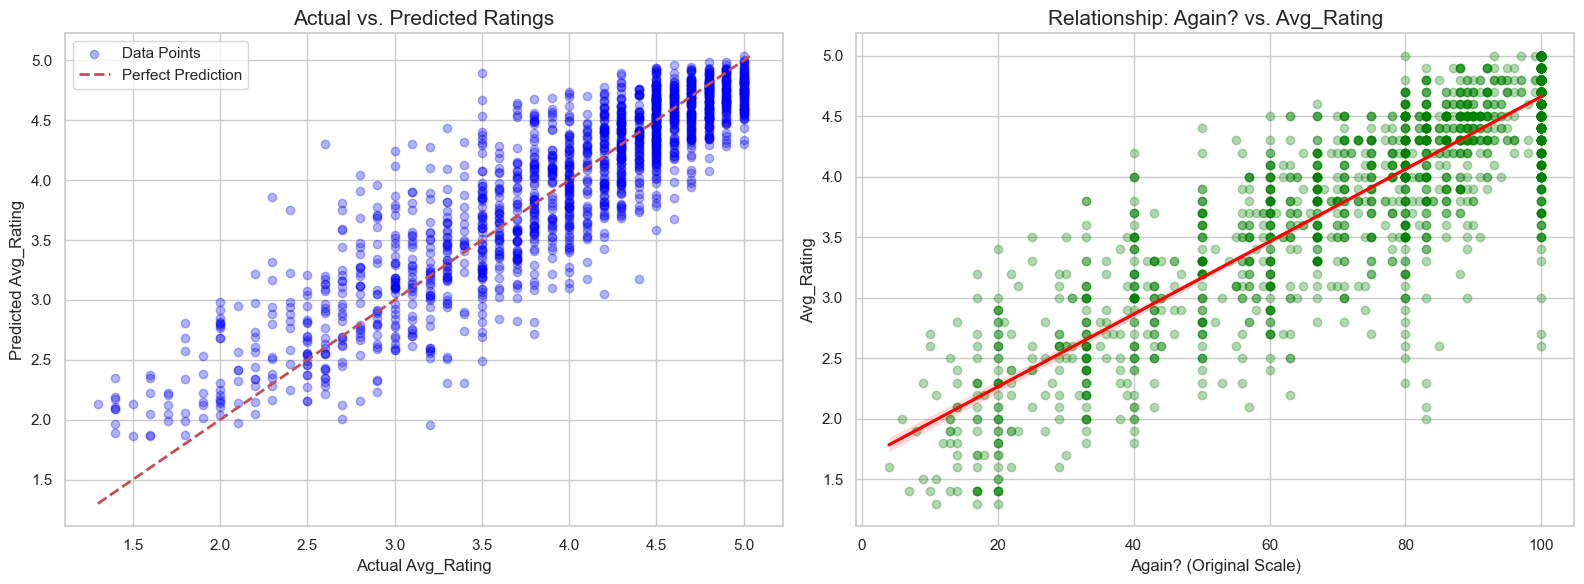

In [223]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Predicted vs Actual Ratings (Model Accuracy) ---
axes[0].scatter(y_test, y_pred, alpha=0.3, color='blue', label='Data Points')

# Draw a red 45-degree line (perfect prediction line)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

axes[0].set_title('Actual vs. Predicted Ratings', fontsize=15)
axes[0].set_xlabel('Actual Avg_Rating', fontsize=12)
axes[0].set_ylabel('Predicted Avg_Rating', fontsize=12)
axes[0].legend()


# --- Plot 2: Strongest Predictor vs. Ratings (Visualizing Trends) ---
strongest_factor = 'Again?'

# To draw this plot, we use the original, unstandardized data (regression_data) for better readability
plot_sample = regression_data.sample(n=min(2000, len(regression_data)), random_state=42)

sns.regplot(
    x=strongest_factor, 
    y='Avg_Rating', 
    data=plot_sample, 
    ax=axes[1], 
    scatter_kws={'alpha':0.3, 'color':'green'}, 
    line_kws={'color':'red'} 
)

axes[1].set_title(f'Relationship: {strongest_factor} vs. Avg_Rating', fontsize=15)
axes[1].set_xlabel(f'{strongest_factor} (Original Scale)', fontsize=12)
axes[1].set_ylabel('Avg_Rating', fontsize=12)

plt.tight_layout()
plt.show()

Bonus: Are the rating of professors in New York state different from those in other states?

In [224]:
# Read the CSV file
num = pd.read_csv("rmpCapstoneNum.csv", header=None)
qual = pd.read_csv("rmpCapstoneQual.csv", header=None)

In [225]:
# Rename columns of qual for better readability
num.columns = ['Avg_Rating', 'Avg_Difficulty', 'NumofRatings', 'Pepper', 'Again?', 'From online', 'Male', 'Female']
qual.columns = ['Field', 'University', 'US State']
qual.head()

,Field,University,US State
0,Criminal Justice,George Mason University,VA
1,NaN,NaN,NaN
2,English,Alabama State University,AL
3,English,University of Kentucky,KY
4,English,Keiser University,FL


In [226]:
qual[qual['US State'] == 'NY']

,Field,University,US State
29,Environment,SUNY Potsdam,NY
33,Mathematics,Medgar Evers College,NY
36,Marketing,Berkeley College,NY
38,Mathematics,Borough of Manhattan Community College,NY
63,English,Baruch College,NY
...,...,...,...
89793,English,SUNY New Paltz,NY
89829,Mathematics,Monroe Community College,NY
89856,Psychology,Long Island University,NY
89867,Education,Long Island University,NY


In [227]:
# Merge num and qual dataframes by index
merged_data = num.merge(qual, left_index=True, right_index=True)
merged_data.head()

,Avg_Rating,Avg_Difficulty,NumofRatings,Pepper,Again?,From online,Male,Female,Field,University,US State
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1,Criminal Justice,George Mason University,VA
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,AL
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0,English,University of Kentucky,KY
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0,English,Keiser University,FL


In [228]:
# Drop null values in Avg_Rating, US State
merged_data = merged_data.dropna(subset=['Avg_Rating', 'US State'])

In [229]:
# Take Mann-Whitney U test to test if there is a significant difference in Avg_Rating between different states

# Use all data
ny_ratings = merged_data.loc[merged_data['US State'] == 'NY', 'Avg_Rating']
other_ratings = merged_data.loc[merged_data['US State'] != 'NY', 'Avg_Rating']

stat, p = mannwhitneyu(ny_ratings, other_ratings, alternative='two-sided')
print("Using all data:")
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

# Use data which has at least 2 ratings, since the last 25% of data has 1 rating
ny_ratings = merged_data.loc[(merged_data['US State'] == 'NY') & (merged_data['NumofRatings'] >= 2), 'Avg_Rating']
other_ratings = merged_data.loc[(merged_data['US State'] != 'NY') & (merged_data['NumofRatings'] >= 2), 'Avg_Rating']

stat, p = mannwhitneyu(ny_ratings, other_ratings, alternative='two-sided')
print("Using data with at least 2 ratings:")
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

# Use data which has at least 3 ratings, since the last 50% of data has less than 3 ratings
ny_ratings = merged_data.loc[(merged_data['US State'] == 'NY') & (merged_data['NumofRatings'] >= 3), 'Avg_Rating']
other_ratings = merged_data.loc[(merged_data['US State'] != 'NY') & (merged_data['NumofRatings'] >= 3), 'Avg_Rating']

stat, p = mannwhitneyu(ny_ratings, other_ratings, alternative='two-sided')
print("Using data with at least 3 ratings:")
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

# Use data which has at least 6 ratings, since the last 75% of data has less than 6 ratings
ny_ratings = merged_data.loc[(merged_data['US State'] == 'NY') & (merged_data['NumofRatings'] >= 6), 'Avg_Rating']
other_ratings = merged_data.loc[(merged_data['US State'] != 'NY') & (merged_data['NumofRatings'] >= 6), 'Avg_Rating']

stat, p = mannwhitneyu(ny_ratings, other_ratings, alternative='two-sided')
print("Using data with at least 6 ratings:")
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

# Use data which has at least 10 ratings
ny_ratings = merged_data.loc[(merged_data['US State'] == 'NY') & (merged_data['NumofRatings'] >= 10), 'Avg_Rating']
other_ratings = merged_data.loc[(merged_data['US State'] != 'NY') & (merged_data['NumofRatings'] >= 10), 'Avg_Rating']

stat, p = mannwhitneyu(ny_ratings, other_ratings, alternative='two-sided')
print("Using data with at least 10 ratings:")
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p}")

Using all data:
Mann-Whitney U test statistic: 168627337.5, p-value: 0.1464846283926016
Using data with at least 2 ratings:
Mann-Whitney U test statistic: 96911760.0, p-value: 0.02494421782976642
Using data with at least 3 ratings:
Mann-Whitney U test statistic: 57806598.0, p-value: 0.2681091399412635
Using data with at least 6 ratings:
Mann-Whitney U test statistic: 14935670.0, p-value: 0.1512814169941711
Using data with at least 10 ratings:
Mann-Whitney U test statistic: 3016390.5, p-value: 0.27092093078556345
